In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
read_malicioso = "/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Novos dados/malicioso.csv"
read_legitimo = "/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Novos dados/legitimo.csv"

legitimo = pd.read_csv(read_legitimo, delimiter="\t")
malicioso = pd.read_csv(read_malicioso, delimiter="\t")

print(legitimo.shape)
print(malicioso.shape)

(24559, 17)
(105981, 17)


<ipython-input-2-8c5958b1a0e9>:5: DtypeWarning: Columns (6,9,11,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  malicioso = pd.read_csv(read_malicioso, delimiter="\t")


In [ ]:
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver'],
      dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver'],
      dtype='object')


# Analise geral

In [ ]:
columns = ['mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos', 'mqtt.ver']
legitimo = legitimo.drop(columns, axis=1)
malicioso = malicioso.drop(columns, axis=1)
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype'],
      dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype'],
      dtype='object')


In [ ]:
print(legitimo.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype'],
      dtype='object')


In [ ]:
legitimo.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0018,0.000000,28,0x30,3
1,0x0018,0.002873,28,0x30,3
2,0x0018,0.002320,2,0xc0,12
3,0x0018,0.002249,2,0xd0,13
4,0x0010,0.065713,0,NaN,NaN


In [ ]:
malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0002,0.0,0,NaN,NaN
1,0x0002,0.0,0,NaN,NaN
2,0x0002,0.0,0,NaN,NaN
3,0x0002,0.0,0,NaN,NaN
4,0x0002,0.0,0,NaN,NaN


Tratamento dos campos N/A

In [ ]:
legitimo.fillna({'tcp.flags': 0, 'tcp.time_delta': 0, 'tcp.len': 0,'mqtt.hdrflags': 0, 'mqtt.msgtype': 0}, inplace=True)
malicioso.fillna({'tcp.flags': 0, 'tcp.time_delta': 0, 'tcp.len': 0,'mqtt.hdrflags': 0, 'mqtt.msgtype': 0}, inplace=True)
print("executado")

executado


In [ ]:
legitimo.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0018,0.000000,28,0x30,3
1,0x0018,0.002873,28,0x30,3
2,0x0018,0.002320,2,0xc0,12
3,0x0018,0.002249,2,0xd0,13
4,0x0010,0.065713,0,0,0


In [ ]:
malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0002,0.0,0,0,0
1,0x0002,0.0,0,0,0
2,0x0002,0.0,0,0,0
3,0x0002,0.0,0,0,0
4,0x0002,0.0,0,0,0


In [ ]:
# rotulacao
legitimo["target"] = 0
malicioso["target"] = 1
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype', 'target'],
      dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype', 'target'],
      dtype='object')


In [ ]:
# mistura do arquivo malicioso
# o arquivo precisa ser misturado porque foram usadas duas ferramentas para executar o ataque

from sklearn.model_selection import train_test_split

one, two = train_test_split(malicioso, test_size=0.33, shuffle=True, random_state=42)
# uniao dos arquivos misturados
malicioso = pd.concat([one, two], ignore_index=True)

malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype,target
0,0x0010,6.358300e-05,0,0,0,1
1,0x0018,5.200000e-08,2896,0,0,1
2,0x0010,1.144900e-05,0,0,0,1
3,0x0010,4.805000e-05,0,0,0,1
4,0x0018,-2.550000e-07,2896,0,0,1


# Balanceamento

In [ ]:
data_df = pd.concat([legitimo, malicioso], ignore_index=True)

def create_balanced_dataset(df):
    num_spam = df[df['target'] == 0].shape[0] # Pegar quantidade de dados do legitimo
    spam_df = df[df['target'] == 0].copy() # Os dados do legitimo

    ham_df = df[df['target'] == 1].sample(num_spam, random_state=123) # Pegar os dados do malicioso
    return pd.concat([ham_df, spam_df]) # retorna dois dataframes concatenados

data = create_balanced_dataset(data_df) # dado balanceado contendo legitimo

print(data.shape)

(49118, 6)


In [ ]:
print(data['target'].value_counts())

target
1    24559
0    24559
Name: count, dtype: int64


In [ ]:
print(data['mqtt.hdrflags'].value_counts())

mqtt.hdrflags
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  33341
0xc0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                4217
0xd0    

In [ ]:
print(data['mqtt.msgtype'].value_counts())

mqtt.msgtype
0                                                                            33341
12                                                                            4217
13                                                                            4081
3                                                                             2784
4                                                                              543
                                                                             ...  
4,7,3,3,3,3,4,7,4,3,6,4,6,6,6,3,7,3,6                                            1
4,6,6,6,3,6,4,6,4,3,6,3,6,3,7,3,6,3,6                                            1
1,7,3,7,4,6,3,2,6,6,4,6,4,7,3,6,6,6,4                                            1
2,3,6,3,6,4,6,6,6,6,4,7,4,6,7,4,2,4,9,3,3,6,3,4,6,6,6,6,3,6,6,3,6,6,6,4          1
6,4,7,4,6,6,3,6,6,3,2,4,6,4,6,3,2,3,6,3,6,6,2,6,6,3,3,6,3,7,3,3,4,6,3,6,3        1
Name: count, Length: 233, dtype: int64


In [ ]:
data = data.drop(['mqtt.hdrflags', 'mqtt.msgtype'], axis=1)

In [ ]:
data.keys()

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'target'], dtype='object')

In [ ]:
data.head()

,tcp.flags,tcp.time_delta,tcp.len,target
126267,0x0010,8.000000e-08,1448,1
45066,0x0010,1.221030e-04,0,1
53564,0x0010,1.943600e-05,0,1
124046,0x0018,3.900000e-08,2896,1
46095,0x0018,3.748162e-02,2896,1


# Tratamento geral

In [ ]:
# Removendo letras e vírgulas, mantendo apenas números e pontos
data['tcp.flags'] = data['tcp.flags'].str.replace(r'[^0-9.]', '', regex=True)
data.head()

,tcp.flags,tcp.time_delta,tcp.len,target
126267,00010,8.000000e-08,1448,1
45066,00010,1.221030e-04,0,1
53564,00010,1.943600e-05,0,1
124046,00018,3.900000e-08,2896,1
46095,00018,3.748162e-02,2896,1


# Treinamento

In [ ]:
# divisao dos dados para treino e teste
train, test = train_test_split(data, test_size=0.33, shuffle=True, random_state=42)

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

# Treinamento

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# gridsearch

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# modelo base - arvore de decisao)
base_estimators = [
    DecisionTreeClassifier(max_depth=1, random_state=42),
    DecisionTreeClassifier(max_depth=2, random_state=42)
]

# grid de parâmetros
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=42),
        DecisionTreeClassifier(max_depth=2, random_state=42)
    ]
}

ada = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

'\n# gridsearch\n\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# modelo base - arvore de decisao)\nbase_estimators = [\n    DecisionTreeClassifier(max_depth=1, random_state=42),\n    DecisionTreeClassifier(max_depth=2, random_state=42)\n]\n\n# grid de parâmetros\nparam_grid = {\n    "n_estimators": [10, 50, 100, 200],\n    "learning_rate": [0.01, 0.1, 0.5, 1.0],\n    "estimator": [\n        DecisionTreeClassifier(max_depth=1, random_state=42),\n        DecisionTreeClassifier(max_depth=2, random_state=42)\n    ]\n}\n\nada = AdaBoostClassifier(random_state=42)\ngrid_search = GridSearchCV(ada, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)\ngrid_search.fit(X_train, y_train)\n\nprint("Melhores parâmetros:", grid_search.best_params_)\nprint("Melhor acurácia:", grid_search.best_score_)\n'

Accuracy train:  0.962046856483029
Accuracy test:  0.9621198099821087 

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8094
           1       0.97      0.95      0.96      8115

    accuracy                           0.96     16209
   macro avg       0.96      0.96      0.96     16209
weighted avg       0.96      0.96      0.96     16209
 

Confusion matrix:
 [[7846  248]
 [ 366 7749]] 



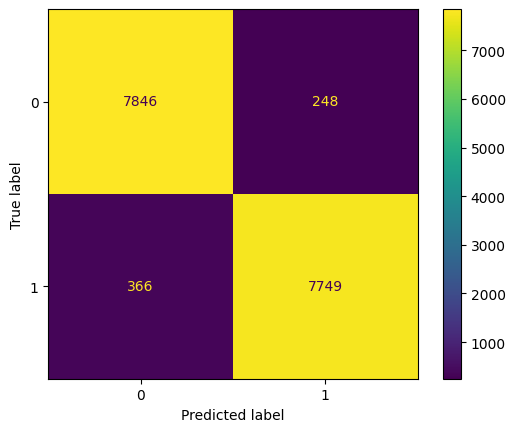

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# modelo final com os melhores parâmetros
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
    learning_rate=0.5,
    n_estimators=200,
    random_state=42
)

ada.fit(X_train, y_train)

print("Accuracy train: ", ada.score(X_train, y_train))


print("Accuracy test: ", ada.score(X_test, y_test), "\n")


# classification report
predict_ada = ada.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_ada), "\n")

# confusion matrix
matrix_ada = confusion_matrix(y_test, predict_ada)
print("Confusion matrix:\n", matrix_ada, "\n")
cm_ada = confusion_matrix(y_test, predict_ada, labels=ada.classes_)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=ada.classes_)
disp_ada.plot()
plt.show()

In [ ]:
# salvamento do modelo
#import pickle
#with open('ada_model.pkl', 'wb') as file:
#    pickle.dump(ada, file)

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     16465
           1       0.97      0.95      0.96     16444

    accuracy                           0.96     32909
   macro avg       0.96      0.96      0.96     32909
weighted avg       0.96      0.96      0.96     32909

Confusion matrix (percent):
 [[97.07  2.93]
 [ 4.53 95.47]]


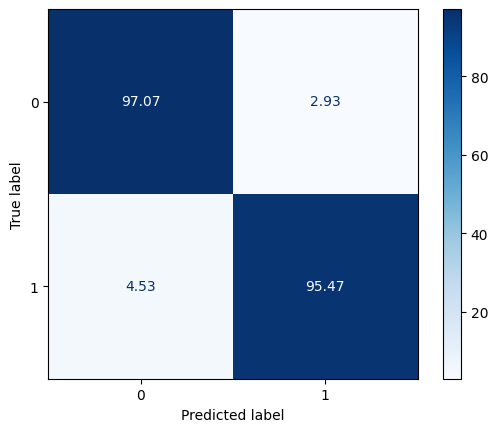

In [ ]:
# ajustes no treinamento

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
    learning_rate=0.5,
    n_estimators=200,
    random_state=42
)

# validação cruzada com kfold = 5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
predict_ada = cross_val_predict(ada, X_train, y_train, cv=cv)

# avaliação do modelo
print("Classification report:")
print(classification_report(y_train, predict_ada))

# matriz de confusao
matrix_ada = confusion_matrix(y_train, predict_ada)
matrix_ada_percent = matrix_ada.astype('float') / matrix_ada.sum(axis=1)[:, np.newaxis] * 100

print("Confusion matrix (percent):\n", np.round(matrix_ada_percent, 2))

disp_ada = ConfusionMatrixDisplay(confusion_matrix=matrix_ada_percent, display_labels=np.unique(y_train))
disp_ada.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.show()